In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

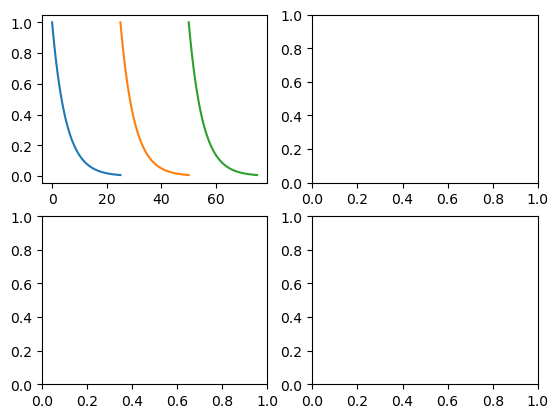

In [26]:
# The logic: each time the neuron fires, a spike appears this is followed by an explonential decay
# try to plot a series of exponentials

fig, ax = plt.subplots(2,2)

z = np.arange(100)
z1 = np.linspace(0,25)
z2 = np.linspace(25,50)
z3 = np.linspace(50,75)
tau_prime = 5
ax[0,0].plot(z1,np.exp(-z1/tau_prime))
ax[0,0].plot(z2,np.exp(-(z1)/tau_prime))
ax[0,0].plot(z3,np.exp(-(z1)/tau_prime))

Ok, so the above simple simulation of the chain of transients didn't work too well. Let's try a different approach


In [20]:
# rough work for the NM simulation

# firing neuron function

def simulate_neuron(n_timesteps):
    
    # Start with an array of the timesteps that we're recording from
    firing_neuron = np.zeros(n_timesteps)

    # Then populate the array with signals - firing & not firing -- with a specific probability that you choose
    for i in range(n_timesteps):
        x = np.random.rand()

        # firing with probability of 1/1000 at each time bin - firing at 1 Hz
        if x < 0.001:
            firing_neuron[i]=1

    # then make a plot of it!
    plt.plot(firing_neuron)
    plt.xlabel('timesteps')
    plt.ylabel('Neuron activity')
    plt.title('Neuron Activity over {} timesteps'.format(n_timesteps))
    plt.show()

    return firing_neuron

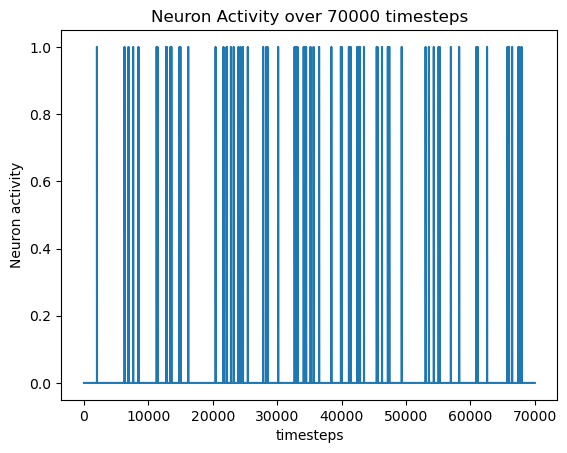

In [21]:
firing_neuron = simulate_neuron(70000)

In [24]:
# takes as input the activity of a neuron over a given number of timesteps
# and returns a plot showing corresponding changes in [NM] 

def nm_transients(neuron_activity):

    # timesteps where the neuron fired
    firing_timesteps = np.nonzero(neuron_activity)

    # the time between the start and the first action potential
    dt_0 = np.array([firing_timesteps[0][0]])

    # array of the intervals between the firing timesteps
    dt_sequence = np.diff(firing_timesteps)

    # Include the time interval for the 1st action potential
    dt_sequence = np.concatenate((dt_0,dt_sequence.flatten()), axis=0)

    # convert dt to seconds so that we don't get infinities/zeros
    dt_sequence_s = dt_sequence/1000

    # length of dt_seq
    length_dt = np.size(firing_timesteps)


    # constants to plug into the equation from the paper -- CHECK W KENTA
    tau = 5
    A = 100
    n = length_dt

    # [NM] transients caused by the neuron firing - equation 7
    transients = (A/(np.exp(dt_sequence_s / tau) - 1)) * (1 - np.exp(-n*dt_sequence_s / tau))

    # find the highest and lowest change in concentration recorded:
    nm_max = np.max(transients)
    nm_min = np.min(transients)

    # Plot NM transients vs time:

    # make an array with the [NM] at all the timesteps,
    # including the timesteps at which spikes/transients were recorded
    nm_conc = neuron_activity
    nm_conc[firing_timesteps] = transients

    # plot the [NM] at all timesteps -- 1st plot
    n_timesteps = neuron_activity.size
    t = np.linspace(0,n_timesteps-1,n_timesteps)

    plt.plot(t,nm_conc)
    plt.xlabel('time (ms)')
    plt.ylabel('NM concentration')
    plt.title('NM concentration across {} timesteps'.format(neuron_activity.size))
    plt.show()


    # generate sequence of numbers to use in plot to compare the different transients
    n_spikes = np.size(firing_timesteps)
    z4 = np.linspace(0,n_spikes-1,n_spikes)

    #plot each of the transients side by side in sequential order 
    # this second plot is just a check -- not necessary
    
    plt.plot(z4,transients)
    plt.xlabel('n (Action potential number)')
    plt.ylabel('NM concentration')
    plt.title('NM transients due to neuron firing')
    plt.show()


    # returns the smallest and largest transient
    return nm_max, nm_min


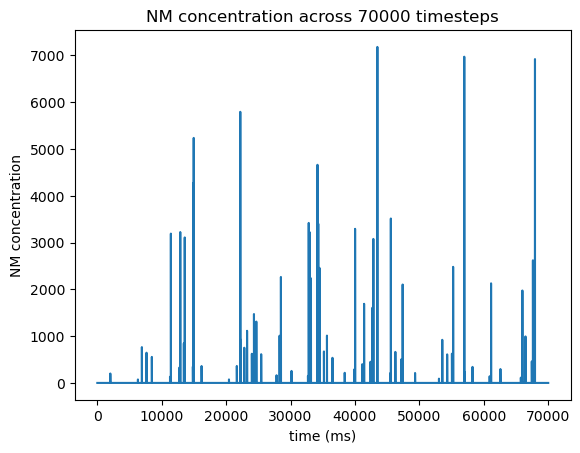

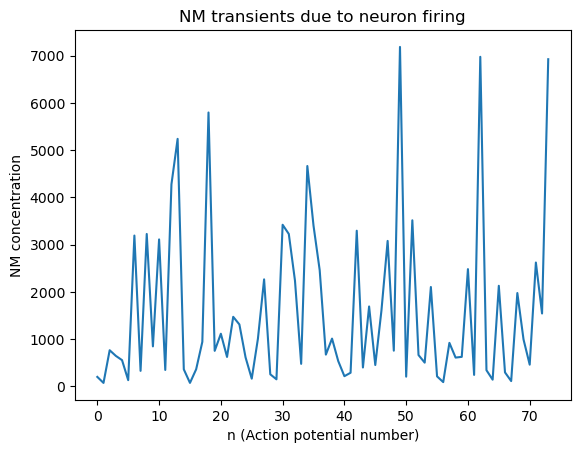

(7182.345463526534, 73.7418623291733)

In [25]:
nm_transients(firing_neuron)
